In [1]:
# Import necessary modules and classes
import pandas as pd
from src.data_preprocessing import DataPreprocessor
from src.metrics_evaluation import ModelMetrics
from src.model_builder import ModelComparer
from src.feature_engineering import FeatureEngineer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
y_test = pd.read_csv('titanic/gender_submission.csv').Survived.values

In [2]:
engineer = FeatureEngineer()
train_transformed, test_transformed = engineer.transform_features(train_df, test_df)

In [3]:
numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'FareBin', 'AgeBin']
categorical_features = ['Sex', 'Embarked', 'Title', 'CabinLevel']
target_feature = 'Survived'

preprocessor = DataPreprocessor(numeric_features, categorical_features, target_feature)
X_train, y_train, X_test = preprocessor.preprocess(train_transformed, test_transformed)

In [4]:
models_params = {
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'): {
        'n_estimators': [100, 200], 'max_depth': [5, 10], 'learning_rate': [0.01, 0.1], 'subsample': [0.8, 1]
    },
    RandomForestClassifier(): {
        'n_estimators': [100, 200], 'max_depth': [5, 10]
    },
    LogisticRegression(): {
        'C': [0.1, 1, 10]
    }
}

model_comparer = ModelComparer(models_params)
best_model = model_comparer.compare_models(X_train, y_train)

predictions = best_model.predict(X_test)
y_score = best_model.predict_proba(X_test)[:, 1]

Training and tuning XGBClassifier...
XGBClassifier best score: 0.8361370912058252
Training and tuning RandomForestClassifier...
RandomForestClassifier best score: 0.8293892411022534
Training and tuning LogisticRegression...
LogisticRegression best score: 0.8260435628648548
Best model: XGBClassifier with score 0.8361370912058252 and params {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}


In [5]:
# Evaluate the model
evaluator = ModelMetrics(y_test, predictions, y_score)
evaluator.report_metrics()

Accuracy: 0.854066985645933
Precision: 0.8053691275167785
Recall: 0.7894736842105263
F1 Score: 0.7973421926910299
ROC AUC Score: 0.916489414325287


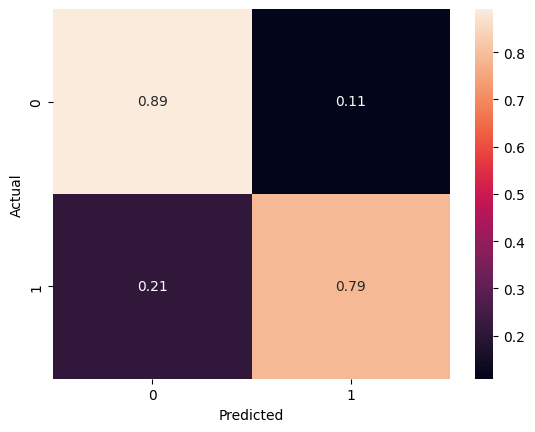

In [6]:
evaluator.plot_confusion_matrix()

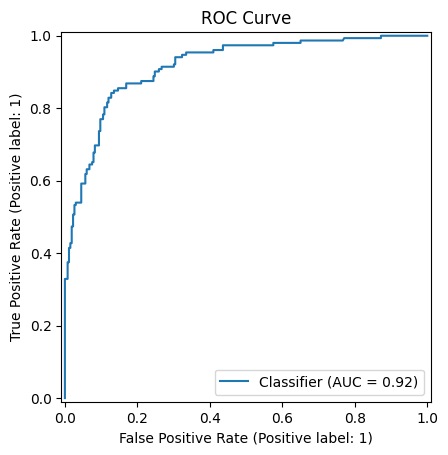

In [7]:
evaluator.plot_roc_curve()